In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Installed Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Imported Necessary Libraries**

**Dataset Source and Preparation**

In [3]:
# Load the dataset
df = pd.read_csv("Phishing_URL_Dataset.csv")
print("\n Dataset loaded successfully.")
print(df.shape)


 Dataset loaded successfully.
(235795, 56)


**Loaded the Dataset**

In [4]:
# Displaying first few rows of dataset
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31.0,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0.0,1,NaN,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23.0,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0.0,1,50.0,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29.0,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0.0,1,10.0,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26.0,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1.0,1,3.0,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33.0,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0.0,1,244.0,15,34,72,1,85,1


**Displaying first few rows of dataset**

In [5]:
# Displaying info of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    233452 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   234348 non-null  float64
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

**Displaying dataframe summary information**

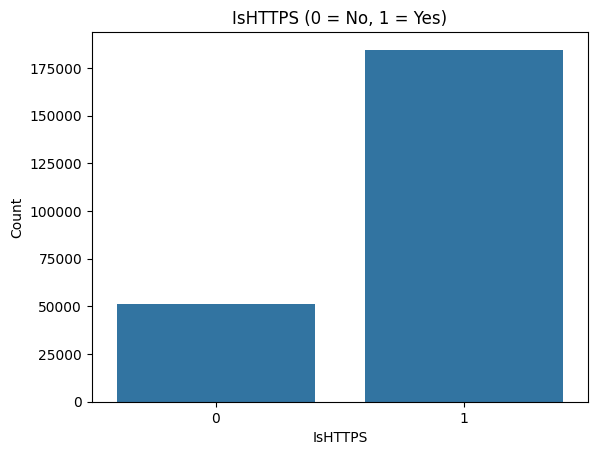

In [6]:
# Univariate Analysis
sns.countplot(x='IsHTTPS', data=df)
plt.title("IsHTTPS (0 = No, 1 = Yes)")
plt.xlabel("IsHTTPS")
plt.ylabel("Count")
plt.show()

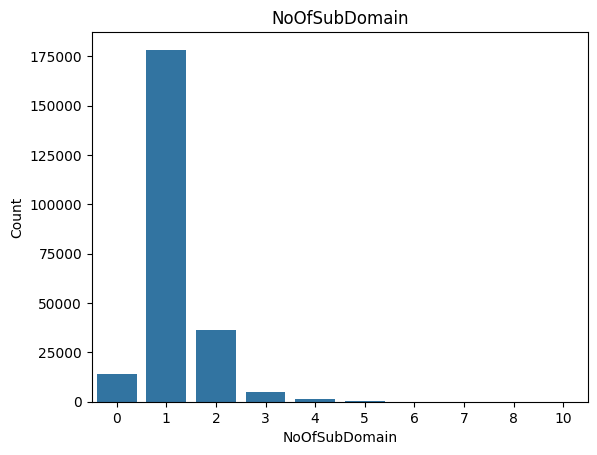

In [7]:
# Univariate Analysis
sns.countplot(x='NoOfSubDomain', data=df)
plt.title("NoOfSubDomain")
plt.xlabel("NoOfSubDomain")
plt.ylabel("Count")
plt.show()

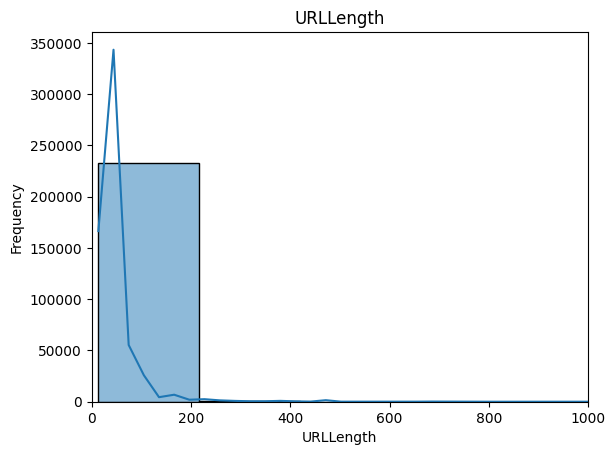

In [8]:
sns.histplot(df['URLLength'], bins=30, kde=True)
plt.title("URLLength")
plt.xlabel("URLLength")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.show()

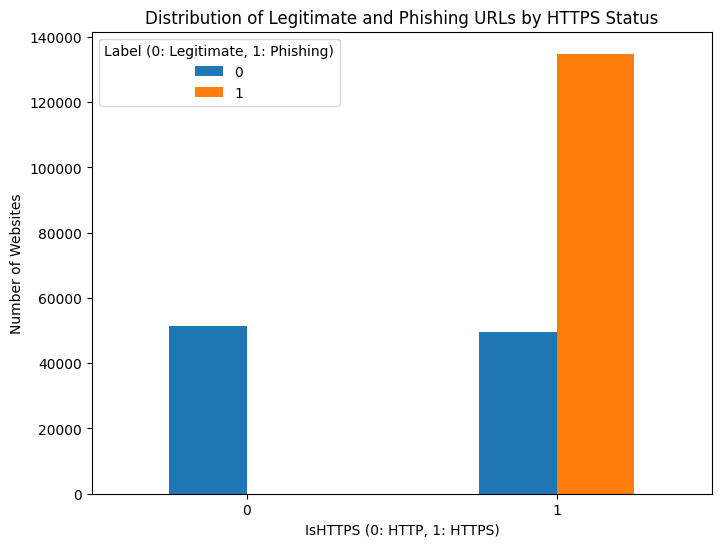

Number of legitimate HTTP websites: 51256
Number of phishing HTTP websites: 0
Number of legitimate HTTPS websites: 49689
Number of phishing HTTPS websites: 134850


In [9]:
# Bivariate Analysis
cross_tab = pd.crosstab(df['IsHTTPS'], df['label'])
# Visualize this relationship using a grouped bar chart
cross_tab.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Legitimate and Phishing URLs by HTTPS Status')
plt.xlabel('IsHTTPS (0: HTTP, 1: HTTPS)')
plt.ylabel('Number of Websites')
plt.xticks(rotation=0)
plt.legend(title='Label (0: Legitimate, 1: Phishing)')
plt.show()

http_legitimate_count = cross_tab.loc[0, 0]
print(f"Number of legitimate HTTP websites: {http_legitimate_count}")

http_phishing_count = cross_tab.loc[0, 1]
print(f"Number of phishing HTTP websites: {http_phishing_count}")

https_legitimate_count = cross_tab.loc[1, 0]
print(f"Number of legitimate HTTPS websites: {https_legitimate_count}")

https_phishing_count = cross_tab.loc[1, 1]
print(f"Number of phishing HTTPS websites: {https_phishing_count}")

In [10]:
# checking if it has any duplicate values
df.duplicated().sum()

np.int64(0)

**No duplicates**

In [11]:
# checking if it has any null values
df.head(10).isnull()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Finding if the Dataset has any null values**

In [12]:
# calculating the sum of null values each column have
df.isnull().sum()

FILENAME                      2343
URL                              0
URLLength                     1447
Domain                           0
DomainLength                     0
IsDomainIP                       0
TLD                              0
URLSimilarityIndex               0
CharContinuationRate             0
TLDLegitimateProb                0
URLCharProb                      0
TLDLength                        0
NoOfSubDomain                    0
HasObfuscation                   0
NoOfObfuscatedChar               0
ObfuscationRatio                 0
NoOfLettersInURL                 0
LetterRatioInURL                 0
NoOfDegitsInURL                  0
DegitRatioInURL                  0
NoOfEqualsInURL                  0
NoOfQMarkInURL                   0
NoOfAmpersandInURL               0
NoOfOtherSpecialCharsInURL       0
SpacialCharRatioInURL            0
IsHTTPS                          0
LineOfCode                       0
LargestLineLength                0
HasTitle            

**Calculated the sum of null values for every column**

In [13]:
# For every column displaying the number of unique values, the unique values, missing values percentage and if it is categorical or not
def column_info(df, features):
    categorical_features = []
    for feature in features:
        unique_values = df[feature].unique()
        missing_percentage = df[feature].isnull().mean() * 100
        num_unique_values = len(unique_values)
        is_categorical = df[feature].dtype == 'object' or df[feature].nunique() < 20

        print(f"Column: '{feature}'")
        print(f"Number of unique values: {num_unique_values}")
        print("Unique values:")
        print(unique_values)
        print(f"Missing value percentage: {missing_percentage:.2f}%")
        print(f"Categorical: {'Yes' if is_categorical else 'No'}")
        print("-----------------------------------------------------------------------------------------")

        if is_categorical:
            categorical_features.append(feature)

    return categorical_features

features = df.columns
categorical_features = column_info(df, features)

Column: 'FILENAME'
Number of unique values: 233453
Unique values:
['521848.txt' '31372.txt' '597387.txt' ... '8100911.txt' '544380.txt'
 '852259.txt']
Missing value percentage: 0.99%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'URL'
Number of unique values: 235370
Unique values:
['https://www.southbankmosaics.com' 'https://www.uni-mainz.de'
 'https://www.voicefmradio.co.uk' ... 'https://www.nononsensedesign.be'
 'https://patient-cell-40f5.updatedlogmylogin.workers.dev/'
 'https://www.alternativefinland.com']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'URLLength'
Number of unique values: 483
Unique values:
[  31.   23.   29.   26.   33.   30.   25.   18.   22.   27.   20.   24.
   21.   28.   36.   37.   32.   91.   40.   35.   19.   41.  140.   34.
   17.   92.   15.   51.   64.   55.   54.   42.   45.   48.   71.

**Observations from the previous cell:**
- Only FILENAME (0.99%), URLLength (0.61%), Crypto (0.05%), and NoOfImage (0.01%) have missing values.
- URLLength can be calculated from the URL column, so missing values in it can be filled using that.
- Columns like FILENAME, URL, Domain, and Title have very high unique values and are text-heavy, so we can drop them.
- URLCharProb also has a very high number of unique values (227K+), but it’s numeric, so we can choose to keep it or evaluate correlation later.
- Categorical Columns: 31
- Numerical Columns: 34

In [14]:
# Fill missing values
# the url length is basically the length of URL(no of characters)
df['URLLength'] = df['URLLength'].fillna(df['URL'].apply(lambda x: len(str(x))))

# Since its categorical filling w mode
df['Crypto'] = df['Crypto'].fillna(df['Crypto'].mode()[0])  # Categorical fill with mode

# Since its numericsl filling w median
df['NoOfImage'] = df['NoOfImage'].fillna(df['NoOfImage'].median())  # Numerical fill with median

# Checking if any row is left w null values
df.isnull().sum()

# didnt fill filename bcoz it's going to be dropped anyways

FILENAME                      2343
URL                              0
URLLength                        0
Domain                           0
DomainLength                     0
IsDomainIP                       0
TLD                              0
URLSimilarityIndex               0
CharContinuationRate             0
TLDLegitimateProb                0
URLCharProb                      0
TLDLength                        0
NoOfSubDomain                    0
HasObfuscation                   0
NoOfObfuscatedChar               0
ObfuscationRatio                 0
NoOfLettersInURL                 0
LetterRatioInURL                 0
NoOfDegitsInURL                  0
DegitRatioInURL                  0
NoOfEqualsInURL                  0
NoOfQMarkInURL                   0
NoOfAmpersandInURL               0
NoOfOtherSpecialCharsInURL       0
SpacialCharRatioInURL            0
IsHTTPS                          0
LineOfCode                       0
LargestLineLength                0
HasTitle            

**Filled the Missing Values**

In [15]:
# Dropcolumns
'''
Filename is unnecessary since it is the name of the file in which the URL was found, 
Dropping URL since all it's attributes have already been extracted,
Domain doesnt contribute to anything important,
Title is the title onto the webpage therefore it is also unnecessary
'''
columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title']
for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(columns=[column])
print(df.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

**Dropped the unecessary columns**

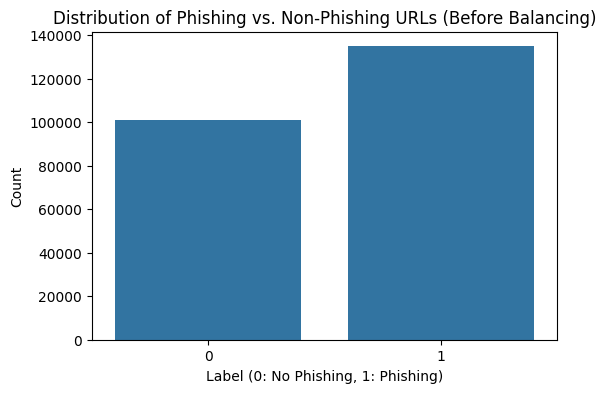

Visualization of target variable distribution (before balancing) saved as 'label_distribution_before_balancing.png'


In [16]:
# Displaying or Visualizing the target variable distribution (before balancing)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Phishing vs. Non-Phishing URLs (Before Balancing)')
plt.xlabel('Label (0: No Phishing, 1: Phishing)')
plt.ylabel('Count')
plt.savefig('label_distribution_before_balancing.png')
plt.show()
print("Visualization of target variable distribution (before balancing) saved as 'label_distribution_before_balancing.png'")

**We can see that the data is imbalanced**

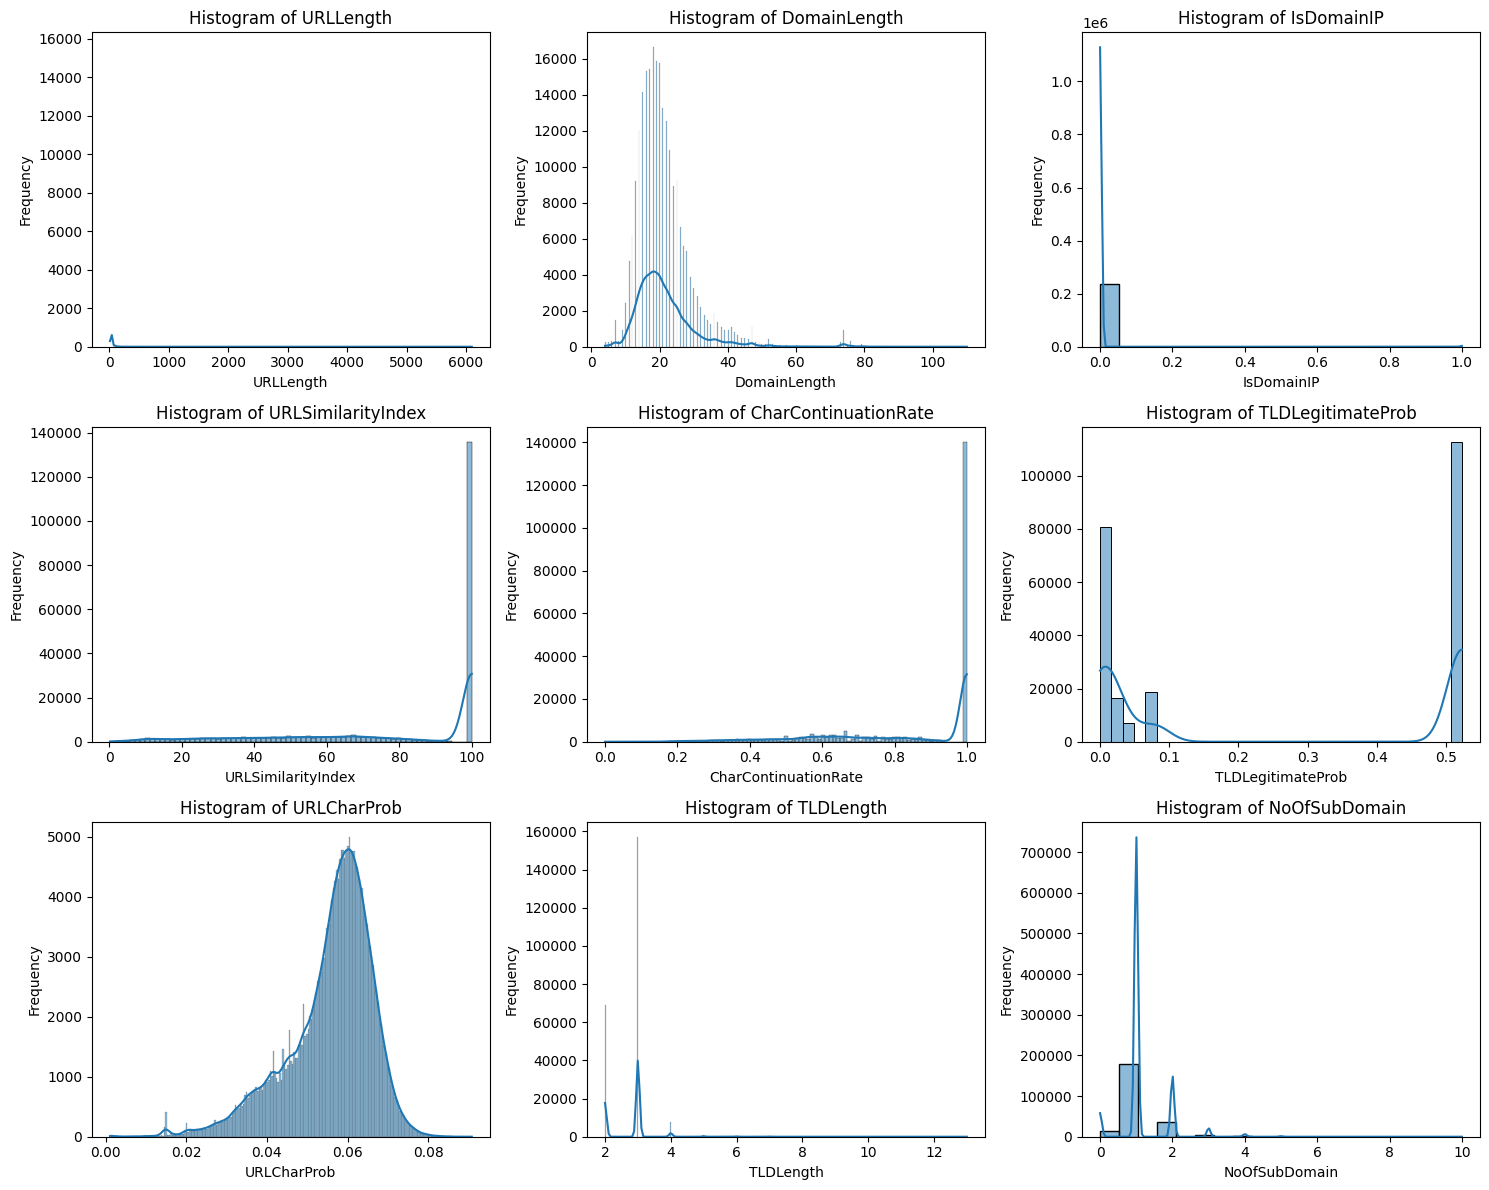

Histograms for the first 9 numerical features saved as 'outlier_histograms_batch1.png'


In [17]:
# Detecting outlier
# Get numerical columns excluding 'label'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'label' in numerical_cols:
    numerical_cols.remove('label')

# Plot only a few columns (first 9)
cols_to_plot = numerical_cols[:9]

# Layout settings
num_cols = len(cols_to_plot)
cols = 3  # 3 plots per row
rows = (num_cols // cols) + int(num_cols % cols != 0)

plt.figure(figsize=(cols * 5, rows * 4))

# Plot histograms
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], bins='auto', kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('outlier_histograms_batch1.png')
plt.show()

print("Histograms for the first 9 numerical features saved as 'outlier_histograms_batch1.png'")

<Axes: ylabel='URLLength'>

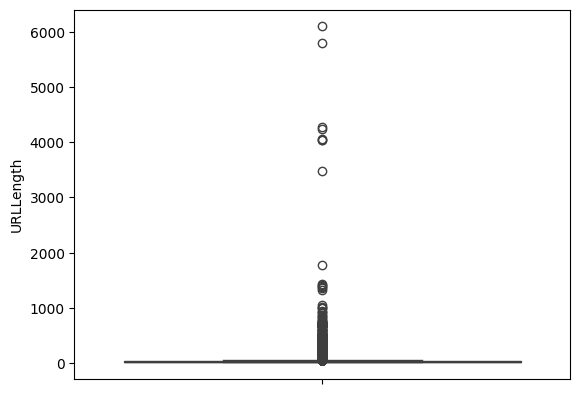

In [18]:
sns.boxplot(y=df['URLLength'])

In [19]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Outliers in '{col}' capped using IQR method.")

Outliers in 'URLLength' capped using IQR method.
Outliers in 'DomainLength' capped using IQR method.
Outliers in 'IsDomainIP' capped using IQR method.
Outliers in 'URLSimilarityIndex' capped using IQR method.
Outliers in 'CharContinuationRate' capped using IQR method.
Outliers in 'TLDLegitimateProb' capped using IQR method.
Outliers in 'URLCharProb' capped using IQR method.
Outliers in 'TLDLength' capped using IQR method.
Outliers in 'NoOfSubDomain' capped using IQR method.
Outliers in 'HasObfuscation' capped using IQR method.
Outliers in 'NoOfObfuscatedChar' capped using IQR method.
Outliers in 'ObfuscationRatio' capped using IQR method.
Outliers in 'NoOfLettersInURL' capped using IQR method.
Outliers in 'LetterRatioInURL' capped using IQR method.
Outliers in 'NoOfDegitsInURL' capped using IQR method.
Outliers in 'DegitRatioInURL' capped using IQR method.
Outliers in 'NoOfEqualsInURL' capped using IQR method.
Outliers in 'NoOfQMarkInURL' capped using IQR method.
Outliers in 'NoOfAmper

**Outlier Treatment Using IQR Capping**
To reduce the effect of extreme values without dropping any rows, outliers in each numerical column were capped using the IQR method. 
The following steps were applied to each column:
- Q1 (25th percentile) and Q3 (75th percentile) were calculated.
- Interquartile Range (IQR) was computed as Q3 - Q1.
- Values below Q1 - 1.5 * IQR were replaced with the lower bound.
- Values above Q3 + 1.5 * IQR were replaced with the upper bound.
This method helped maintain the structure of the dataset while minimizing the influence of extreme outliers.

<Axes: ylabel='URLLength'>

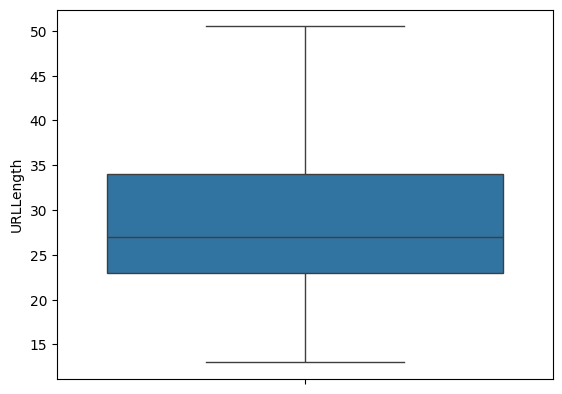

In [20]:
sns.boxplot(y=df['URLLength'])

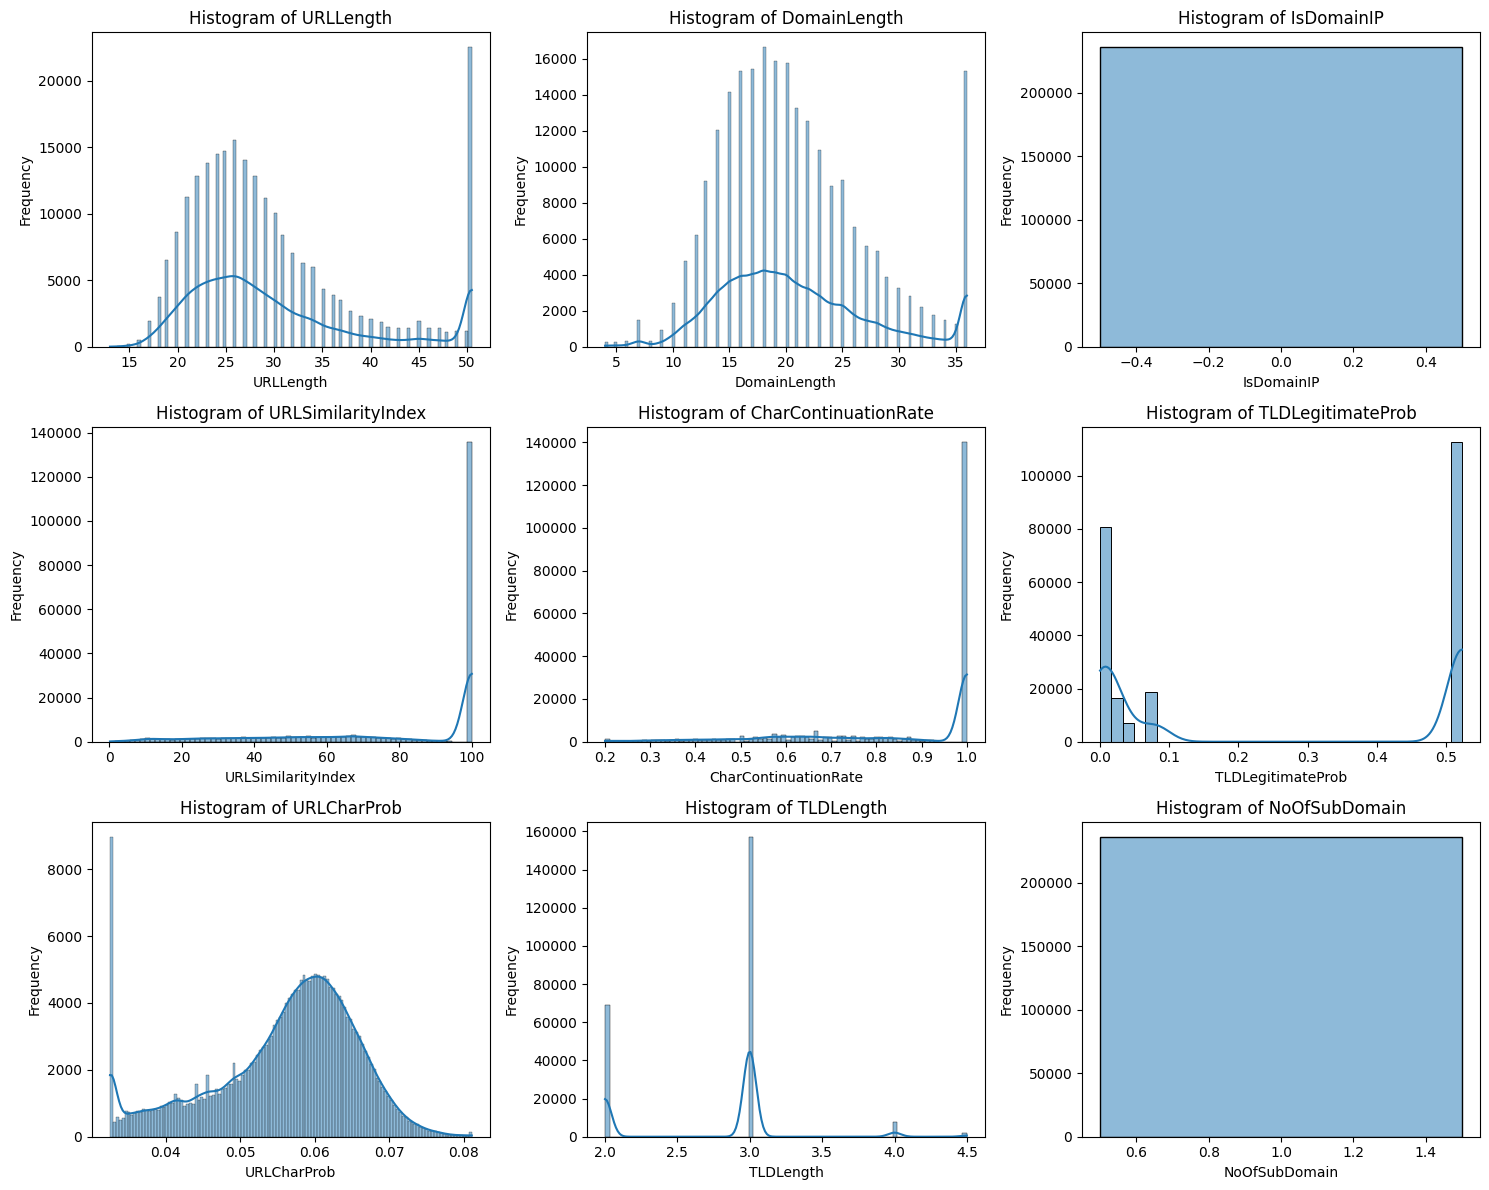

Histograms for the first 9 numerical features saved as 'capped_outliers.png'


In [21]:
# Get numerical columns excluding 'label'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'label' in numerical_cols:
    numerical_cols.remove('label')

# Plot only a few columns ( first 9)
cols_to_plot = numerical_cols[:9]

# Layout settings
num_cols = len(cols_to_plot)
cols = 3  # 3 plots per row
rows = (num_cols // cols) + int(num_cols % cols != 0)

plt.figure(figsize=(cols * 5, rows * 4))

# Plot histograms
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], bins='auto', kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('capped_outliers.png')
plt.show()

print("Histograms for the first 9 numerical features saved as 'capped_outliers.png'")

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# Encode categorical features 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns before encoding: {categorical_cols}")

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    print(f"Column '{col}' encoded using Label Encoding.")
print(f"Categorical columns after encoding: {df.select_dtypes(include=['object']).columns.tolist()}")

Categorical columns before encoding: ['TLD']
Column 'TLD' encoded using Label Encoding.
Categorical columns after encoding: []


**Label Encoding was used to convert categorical features into numerical representations so that machine learning models can process**

In [23]:
# Balancing the Dataset
from imblearn.over_sampling import SMOTE
print("\n Balancing the Dataset")
print("Original class distribution:")
print(df['label'].value_counts())

X = df.drop('label', axis=1)
y = df['label']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

print("\nClass distribution after balancing using SMOTE:")
print(df_balanced['label'].value_counts())


 Balancing the Dataset
Original class distribution:
label
1    134850
0    100945
Name: count, dtype: int64

Class distribution after balancing using SMOTE:
label
1    134850
0    134850
Name: count, dtype: int64


- Imbalanced class distribution can negatively affect the performance of machine learning models, especially in classification tasks. 
- In this dataset, the target variable label was found to be imbalanced.
- The Synthetic Minority Over-sampling Technique (SMOTE) was used to address this issue by generating synthetic examples of the minority class.
- SMOTE was applied to the training set to generate synthetic samples for the minority class.
- A new balanced dataset was formed by combining the resampled features and labels.
- As a result, both classes now have an equal number of samples, which helps improve model training fairness and performance.

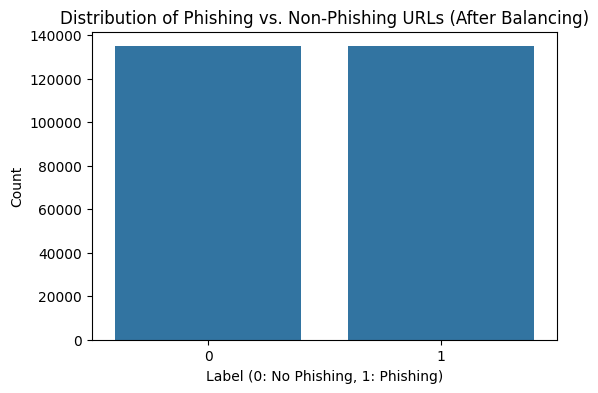

Visualization of target variable distribution (after balancing) saved as 'label_distribution_after_balancing.png'

Balanced dataset saved to 'phishing_urls_balanced.csv'


In [24]:
# Visualize the target variable distribution (after balancing)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_balanced)
plt.title('Distribution of Phishing vs. Non-Phishing URLs (After Balancing)')
plt.xlabel('Label (0: No Phishing, 1: Phishing)')
plt.ylabel('Count')
plt.savefig('label_distribution_after_balancing.png')
plt.show()
print("Visualization of target variable distribution (after balancing) saved as 'label_distribution_after_balancing.png'")

df_balanced.to_csv('phishing_urls_balanced.csv', index=False)
print("\nBalanced dataset saved to 'phishing_urls_balanced.csv'")

In [25]:
print("\n Standardization")
# Separate features and target variable from the balanced dataset
X_balanced = df_balanced.drop('label', axis=1)
y_balanced = df_balanced['label']

# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X_balanced)
df_standardized = pd.DataFrame(X_standardized, columns=X_balanced.columns)
print("\nFirst few rows of standardized features:")
print(df_standardized.head())


 Standardization

First few rows of standardized features:
   URLLength  DomainLength  IsDomainIP       TLD  URLSimilarityIndex  \
0   0.018294      0.426236         0.0 -0.604980            0.845613   
1  -0.805505     -0.725505         0.0 -0.446342            0.845613   
2  -0.187656      0.138301         0.0  2.264297            0.845613   
3  -0.496581     -0.293602         0.0 -0.604980            0.845613   
4   0.224244      0.714171         0.0  1.271086            0.845613   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              0.760841           1.054324     0.659311   0.450770   
1             -0.738340          -0.891344    -0.510550  -1.409908   
2              0.161169          -0.907596     0.878353  -1.409908   
3              0.760841           1.054324     0.227578   0.450770   
4              0.760841          -0.703576     0.410713   0.450770   

   NoOfSubDomain  ...  Bank  Pay  Crypto  HasCopyrightInfo  NoOfImage  \
0            

**Before training machine learning models, it's essential to bring all features to a common scale, especially when the dataset contains features with varying ranges. 
Standardization was applied to the balanced dataset to ensure that each feature contributes equally to the model’s learning process.**

In [26]:
print("--- Original Feature Stats ---")
print(X_balanced[cols_to_plot].agg(['mean', 'std']))

print("\n--- Standardized Feature Stats ---")
print(df_standardized[cols_to_plot].agg(['mean', 'std']))

--- Original Feature Stats ---
      URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
mean  30.822346     21.039363         0.0           74.801547   
std    9.711122      6.946018         0.0           29.799103   

      CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
mean              0.830832           0.257245     0.055325   2.757739   
std               0.222344           0.251974     0.010023   0.537439   

      NoOfSubDomain  
mean            1.0  
std             0.0  

--- Standardized Feature Stats ---
         URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
mean -2.360572e-16  2.647213e-16         0.0       -4.788589e-16   
std   1.000002e+00  1.000002e+00         0.0        1.000002e+00   

      CharContinuationRate  TLDLegitimateProb   URLCharProb     TLDLength  \
mean         -1.534372e-16       2.297342e-16 -4.518809e-16  9.320044e-16   
std           1.000002e+00       1.000002e+00  1.000002e+00  1.000002e+00   

      NoOfSubD

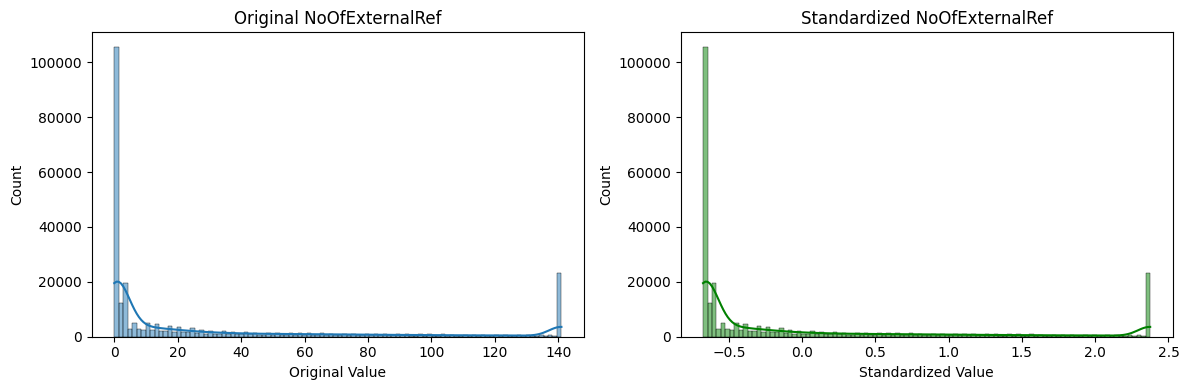

In [27]:
feature = 'NoOfExternalRef' 

plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
sns.histplot(X_balanced[feature], kde=True)
plt.title(f'Original {feature}')
plt.xlabel('Original Value')

# Standardized
plt.subplot(1, 2, 2)
sns.histplot(df_standardized[feature], kde=True, color='green')
plt.title(f'Standardized {feature}')
plt.xlabel('Standardized Value')

plt.tight_layout()
plt.show()

In [28]:
# Normalization
print("\n Normalization")
scaler_normalize = MinMaxScaler()
X_normalized = scaler_normalize.fit_transform(X_balanced)
df_normalized = pd.DataFrame(X_normalized, columns=X_balanced.columns)
print("\nFirst few rows of normalized features:")
print(df_normalized.head())


 Normalization

First few rows of normalized features:
   URLLength  DomainLength  IsDomainIP       TLD  URLSimilarityIndex  \
0   0.480000       0.62500         0.0  0.332853                 1.0   
1   0.266667       0.37500         0.0  0.365994                 1.0   
2   0.426667       0.56250         0.0  0.932277                 1.0   
3   0.346667       0.46875         0.0  0.332853                 1.0   
4   0.533333       0.68750         0.0  0.724784                 1.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           1.000000     0.605576        0.4   
1              0.583333           0.062440     0.363869        0.0   
2              0.833333           0.054608     0.650833        0.0   
3              1.000000           1.000000     0.516375        0.4   
4              1.000000           0.152920     0.554213        0.4   

   NoOfSubDomain  ...  Bank  Pay  Crypto  HasCopyrightInfo  NoOfImage  \
0            0.0 

**Before training machine learning models, it's important to bring features to a common scale, especially when they have different units or ranges.
Normalization was applied to the balanced dataset to rescale all features to a fixed range (typically 0, 1), ensuring that no single feature dominates due to its scale. This helps models based on distance calculations to perform more effectively.**

In [29]:
print("--- Original Feature Stats ---")
print(X_balanced[cols_to_plot].agg(['mean', 'std']))

print("\n--- Standardized Feature Stats ---")
print(df_normalized[cols_to_plot].agg(['mean', 'std']))

--- Original Feature Stats ---
      URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
mean  30.822346     21.039363         0.0           74.801547   
std    9.711122      6.946018         0.0           29.799103   

      CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
mean              0.830832           0.257245     0.055325   2.757739   
std               0.222344           0.251974     0.010023   0.537439   

      NoOfSubDomain  
mean            1.0  
std             0.0  

--- Standardized Feature Stats ---
      URLLength  DomainLength  IsDomainIP  URLSimilarityIndex  \
mean   0.475263      0.532480         0.0            0.747623   
std    0.258963      0.217063         0.0            0.298455   

      CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
mean               0.78854           0.491952     0.469355   0.303095   
std                0.27793           0.481871     0.206613   0.214976   

      NoOfSubDomain  
mean         

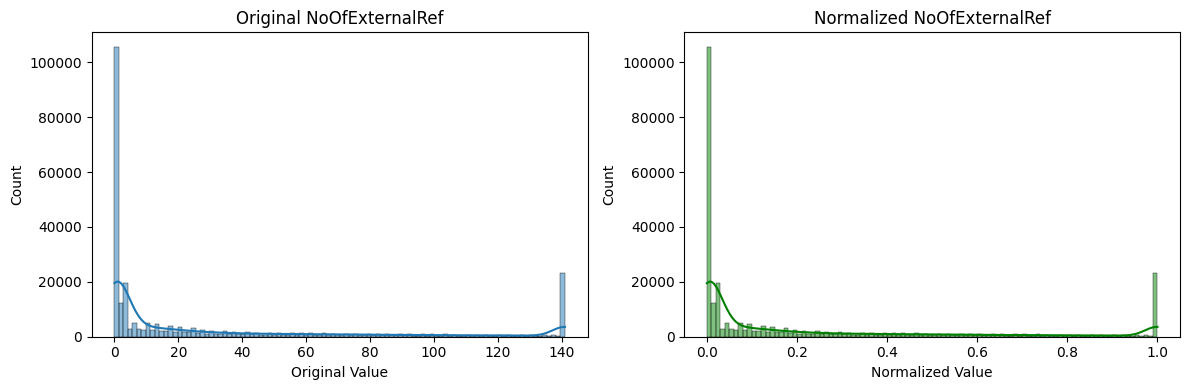

In [30]:
feature1 = 'NoOfExternalRef'  

plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
sns.histplot(X_balanced[feature1], kde=True)
plt.title(f'Original {feature1}')
plt.xlabel('Original Value')

# Standardized
plt.subplot(1, 2, 2)
sns.histplot(df_normalized[feature1], kde=True, color='green')
plt.title(f'Normalized {feature1}')
plt.xlabel('Normalized Value')

plt.tight_layout()
plt.show()